# Visualización Dataset de Felicidad en 2022

Autores : 

    - Gozde Yazganoglu
    
    - Irma Sanchez
    
    - Ignacio Gonzalez

### 1. Instalacion de  las librerías necessarias.

In [1]:
!pip install sweetviz
!pip install streamlit
!pip install geopandas

### 2. Importación de las librerías.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import altair as alt
import geopandas as gpd
import streamlit as st
import matplotlib.gridspec as gs


## 3.Datos

En este trabajo utilizamos 2 datasets. El dataset númerico de Felicidad viene de Kaggle. Para acompañar bien dicho dataset, hemos elegido utilizar también datos de paises. En nuestro trabajo hemos elegido paises de Europa. El geodata viene del sitioweb de efrainmaps.

En cuanto al dataset de felicidad, El Informe Mundial de la Felicidad es una encuesta histórica sobre el estado de la felicidad mundial. Los principales expertos en todos los campos (economía, psicología, análisis de encuestas, estadísticas nacionales, salud, políticas públicas y más) describen cómo las mediciones del bienestar se pueden usar de manera efectiva para evaluar el progreso de las naciones. Los informes revisan el estado de la felicidad en el mundo actual.

Ahora vamos a visualizar el dataset.

In [3]:
#Datos Numericos

data = pd.read_csv('data/World Happiness Report 2022.csv')
#https://www.kaggle.com/code/swetarajsinha/happiness-ranking-2022-hierarchical-clustering
data 

FileNotFoundError: [Errno 2] No such file or directory: 'data/World Happiness Report 2022.csv'

Como podemos ver en este dataset nos encontramos un ranking de los diferentes paises del mundo oordenados de 'mejor' a 'peor' en función de diversas variables como son : Happines score, Dystopia, GDP per capita, social support.

Las variables que nos encontramos son las siguientes: 

-RANGO - número en el ranking de países.

-País - país investigado.

-Puntaje de felicidad: un índice que refleja el bienestar de las personas y el estado del medio ambiente en diferentes países del mundo, que fue propuesto por New Economics Foundation en julio de 2006.

-Whisker-high y Whisker-low: Whisker (bajo) es el cuartil (número real entre 0 y 10) a partir del cual se calcula la puntuación de felicidad.

-Dystopia (1.83) + residual - No puedo encontrar información en fuentes abiertas

-Explicado por: El PIB per cápita, es la relación entre el PIB y la población del país, que muestra cuánto del producto bruto producido en el país en un año y expresado en términos de valor, corresponde a un habitante de este país.

-Explicado por: El apoyo social, es una forma de expresión de la política social del Estado, encaminada a brindar asistencia social a los ciudadanos necesitados.

-Explicado por: Esperanza de vida saludable, La esperanza de vida saludable es un indicador para calcular qué esperanza de vida debe ajustarse a la salud del individuo. Este indicador representa el período de tiempo (años, meses, días) durante el cual se espera que un individuo tenga un determinado estado de salud, con un nivel constante de mortalidad y morbilidad.

-Explicado por: Libertad para tomar decisiones en la vida, el derecho de una persona a expresar libremente su opinión. Este derecho incluye la libertad de opinar y la libertad de recibir y difundir información e ideas sin interferencia alguna de las autoridades públicas y sin consideración de fronteras.

-Explicado por: Generosidad, La característica principal de la caridad es la elección voluntaria del tipo, el tiempo y el lugar, así como el contenido de la asistencia (dirigida). La caridad se distingue como una manifestación de compasión por el prójimo y el deber moral del poseedor de acudir en ayuda del desposeído.

-Explicado por: Percepciones de corrupción, un índice compilado por la organización no gubernamental internacional Transparencia Internacional para reflejar la evaluación del nivel de percepción de corrupción por parte de analistas y empresarios en una escala de 100 puntos. Compilado anualmente desde 1995. 

In [ ]:
#geodata
geodata = gpd.read_file('data/Europe.shp')
geodata.columns = ['Country', 'Country_orig','geometry']
geodata.head()

#https://www.efrainmaps.es/english-version/free-downloads/europe/

Dataset que nos permite realizar visualizaciones geoespaciales. En cuanto a variables, tenemos un número muy reducido. En este caso hemos utillizado los datos correspondientes a europa.

País: País en cuestión
Geomtría: Forma geoespacial del pais a representar. Esta variable se encuentra en formato CRS o sistemas de referencia de coordenadas. Estos  son importantes porque las formas geométricas en un GeoDataFrame son simplemente una colección de coordenadas en un espacio arbitrario. Un CRS le dice a Python cómo se relacionan esas coordenadas con los lugares de la Tierra. Una proyección de mapa (o un sistema de coordenadas proyectadas) es una transformación sistemática de las latitudes y longitudes en una superficie plana donde las unidades se representan comúnmente como metros (en lugar de grados decimales). 


In [ ]:
# Agregamos datos a nivel de provincia usando la función `dissolve`. Es el equivalente a `groupby` de pandas pero sobre
# datos espaciales
(geodata
    .dissolve(by='Country')
    .plot()
)

plt.title('Test of Europe Map')

Finalmente podemos explorar los datos númericos utilizando también un API con ayuda de librería sweetviz. 

In [ ]:
analyze_report=sv.analyze(data)
analyze_report.show_html('data/primer_analisis.html')

### 4.Gráficos

 - > Visualización de 'Happiness Score' en todos los paises. 


In [ ]:
#setting plot styles
bodyFont = {
    'fontfamily': 'monospace',
    'fontsize': '25',
    'fontweight': 'demi',
    'picker': True
}

titleFont = {
    'fontfamily': 'sans-serif',
    'fontsize': '25',
    'fontweight': 'bold',
    'picker': True
}


fig = plt.figure(figsize=(50, 60))
sns.barplot(data=data, x='Happiness score', y='Country', palette="flare")


#checking that the axes is correct to customize visuals with matplotlib
ax = plt.gca()
#print(id(ax) == id(plt.gca()))

#axes customization
ax.set_title('Happiness scores 2022', fontdict=titleFont, pad=20)
ax.set_xlabel('Happiness scores', fontdict={'fontsize': '18'})
ax.set_ylabel('Countries', fontdict={'fontsize': '18'})
ax.tick_params(axis='y', direction='inout', labelsize='x-large', labelright=True)
ax.set_yticklabels(labels=data['Country'], fontdict={'fontfamily': 'monospace'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
     

Mediante esta visualización se quiere representar el ranking de los paises en función de su happines score. Para ello se está implementando un barplot que nos permite representar el ranking de forma escalonada en función de su score. Se puede ver facilmente cual es el 'país' y el peor de manera muy visual. El unico problema que presenta, que no estaría relacionado con la elección del gráfico para responder a lo que se está queriendo mostrar, es la propia naturaleza del dataset que presenta un número elevado de paises. Por lo tanto el gráfico es más grande de lo deseado. 

En este caso, al ser un dataset que presenta tantos paises hemos tenido que utilizar un tamaño pequeño para poder mostrar todos los paises sin perder la capacidad de ver correctamente cada país. Hemos elegido el color rojo que se adapta bien al término felicidad y colores más oscuros para representar la posición de los paises con menos score. 

Por ello, hemos decidio mostrar los 5 mejores y peores paises.

 - > Para ver mejor podemos ver los 5 mejores y 5 peores.

In [ ]:
# Top 5 and bottom 5 countries in 2022 report
fig= plt.figure(figsize=(15,8))
g=gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("Top 5 and Bottom 5 countries in Happiness index 2022", family='Sans-Serif', weight='bold', size=20)
ax1=plt.subplot(g[0,0])

top_5=data.head(5)
bot_5=data.tail(5)
ax1=sns.barplot(data=top_5, x=top_5['Happiness score'],y=top_5['Country'], color='yellow')
#ax1.set_xlabel('')
ax1.xaxis.set_visible(False)
ax1.annotate("Top 5 countries in Happiness index",xy=(8,2), family='Sans-Serif', weight='bold', size=12)
ax2=plt.subplot(g[1,0], sharex=ax1)
ax2=sns.barplot(data=bot_5, x=bot_5['Happiness score'],y=bot_5['Country'], color='blue')
ax2.annotate("Bottom 5 countries in Happiness index",xy=(8,2), family='Sans-Serif', weight='bold', size=12)
for s in ['left','right','top','bottom']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

En este caso hemos utilizado un barplot con dos axis para representar los 5 mejores y peores paises. De este forma visual, podemos sin llegar a representar todos los paises, responder a la pregunta de que paises estarían arriba y abajo del ranking en función de su happines score. Colores como el amarillo que se vinculan a la felicidad han sido elegidos para mostrar los mejores paises. 

In [ ]:
selector=alt.selection_multi(fields =['Happiness score'], bind='legend')

base_scat = alt.Chart(data).mark_point().encode(
    x ='Explained by: GDP per capita:Q',
    y ='Happiness score:Q',
    opacity = alt.condition(selector, alt.value(1), alt.value(0.2)),
    tooltip = ['Country:N'],
    
).add_selection(
    selector
).interactive()

alt.hconcat(
    base_scat.encode(x='Explained by: GDP per capita:Q').properties(title='Happiness-GDP per Capita'),
    
)


Ahora, queremos ver que como afecta la riqueza a la puntuación de happines. Para ello, hemos utilizado un scatterplot generado mediante altair. Esto nos permite, ampliar el gráfico sobre la zona que queremos y con el cursor podemos saber que pais es el que estamos observando. Nos parece una mejor opción, ya que mediante un scatterplot normal, tendríamos que discernir entre paises mediante un filtro de color asignado a cada país. Lo cual sería un poco intrusivo y podría generar confusión. 

In [ ]:
selector=alt.selection_multi(fields =['Happiness score'], bind='legend')

base_scat = alt.Chart(data).mark_point().encode(
    y='Happiness score:Q',
    x='Explained by: Perceptions of corruption:Q',
    opacity = alt.condition(selector, alt.value(1), alt.value(0.2)),
    tooltip = ['Country:N'],
    
).add_selection(
    selector
).interactive()

alt.hconcat(
    base_scat.encode(x='Explained by: Perceptions of corruption:Q').properties(title='Happiness-Corruption'),
    
)


Lo mismo ocurre con este gráfico en el que queremos ver como afecta la corrupción de un país a su score. Es una forma muy visual de representar dos variables en vez de utilizar un gráfico de líneas. 

El gráfico de dispersión es una excelente manera de visualizar la correlación entre dos o más medidas al mismo tiempo permitiendo diferenciar valores y simplificar la identificación de países.

Para entender mejor los variables 'Generosity' y 'Dystopia' mejor miramos en el gráfico.

In [4]:
data_dist_generosity= data[['Dystopia (1.83) + residual', 'Explained by: Generosity','RANK']]

NameError: name 'data' is not defined

In [5]:
#sns.lineplot(data=data_dist_generosity, x=top_5['Happiness score'],y=top_5['Country'])
ax1=sns.lineplot(data=data_dist_generosity, 
                 x=data_dist_generosity['RANK'],
                 y=data_dist_generosity['Dystopia (1.83) + residual'])
plt.title('Dystopia vs Rank')

NameError: name 'data_dist_generosity' is not defined

En este caso, estamos comparando la variale Dystopia frente al ranking. Queremos ver los posibles picos que se pueden presentar para ver la posible relación que tiene esta variable con el ranking. 

Text(0.5, 1.0, 'Generosity vs Rank')

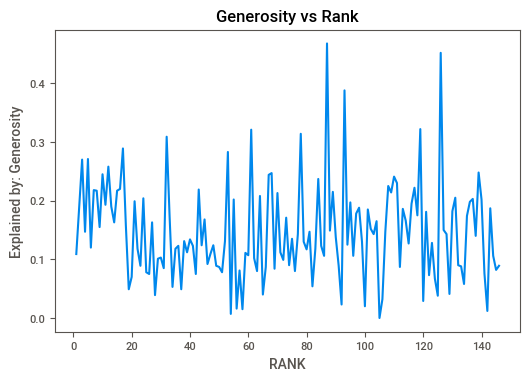

In [13]:
ax1=sns.lineplot(data=data_dist_generosity, 
                 x=data_dist_generosity['RANK'],
                 y=data_dist_generosity['Explained by: Generosity'])
plt.title('Generosity vs Rank')

 - > Mapas de Felicidad

Finalmente utilizamos mapas geoespaciales ya que son la manera más efectiva y visual en este caso de representar datos geoespaciales. De esta forma, podemos identificar de manera muy visual posibles tendencias que presenten los datos.

Text(0.5, 1.0, 'Happiness in Europe')

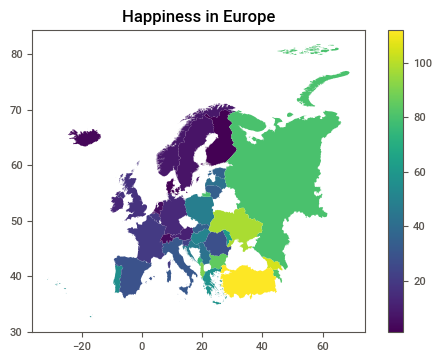

In [35]:


# El dataframe con los datos tiene que ir primero para no perder las propiedades de geopandas


(geodata
    .dissolve(by='Country')
    .merge(data, on='Country', how='left')
    .plot('RANK', legend=True)
    
 
)

plt.title('Happiness in Europe')




En este caso se quiere mostrar el happines score por paises. Si que creemos que es el mejor gráfico para representar datos geoespaciales y así responder a la pregunta que nos planteamos ya que nos permite ver posibles tendencias. En este caso podemos observar que los paises del norte suelen presentar un happines score más bajo posiblemente por las temperaturas y horas de sol. 

Text(0.5, 1.0, 'Corruption in Europe')

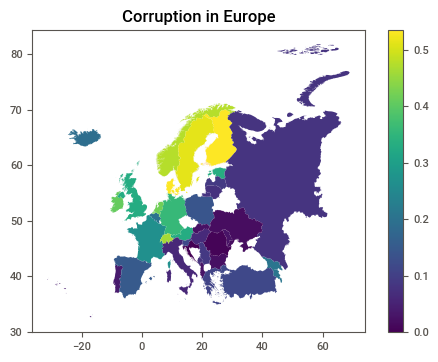

In [15]:
(geodata
    .dissolve(by='Country')
    .merge(data, on='Country', how='left')
    .plot('Explained by: Perceptions of corruption', legend=True)
    
 
)

plt.title('Corruption in Europe')

En este caso queremos mostrar la corrupción por paises. Podemos ver que los paises del centro de de europa presentan un menor índice de corrupción. Gracias a este gráfico podemos responder perfectamente a la pregunta. Hemos empleado tanto en este gráfico como en el anterior colores más llamativos para resaltar los paises que tomán valores altos en las variables que estamos estudiando. 

Respecto a estos gráficos evidentemente se puede realizar por ejemplo un gráfico de barras. Sin embargo, estamos perdiendo esa facilidad o capacidad a la hora de observar posibles tendencias por zonas geográficas. 

Por lo tanto considero que los diagramas geoespaciales son la mejor opción para representar datos geoespaciales. 

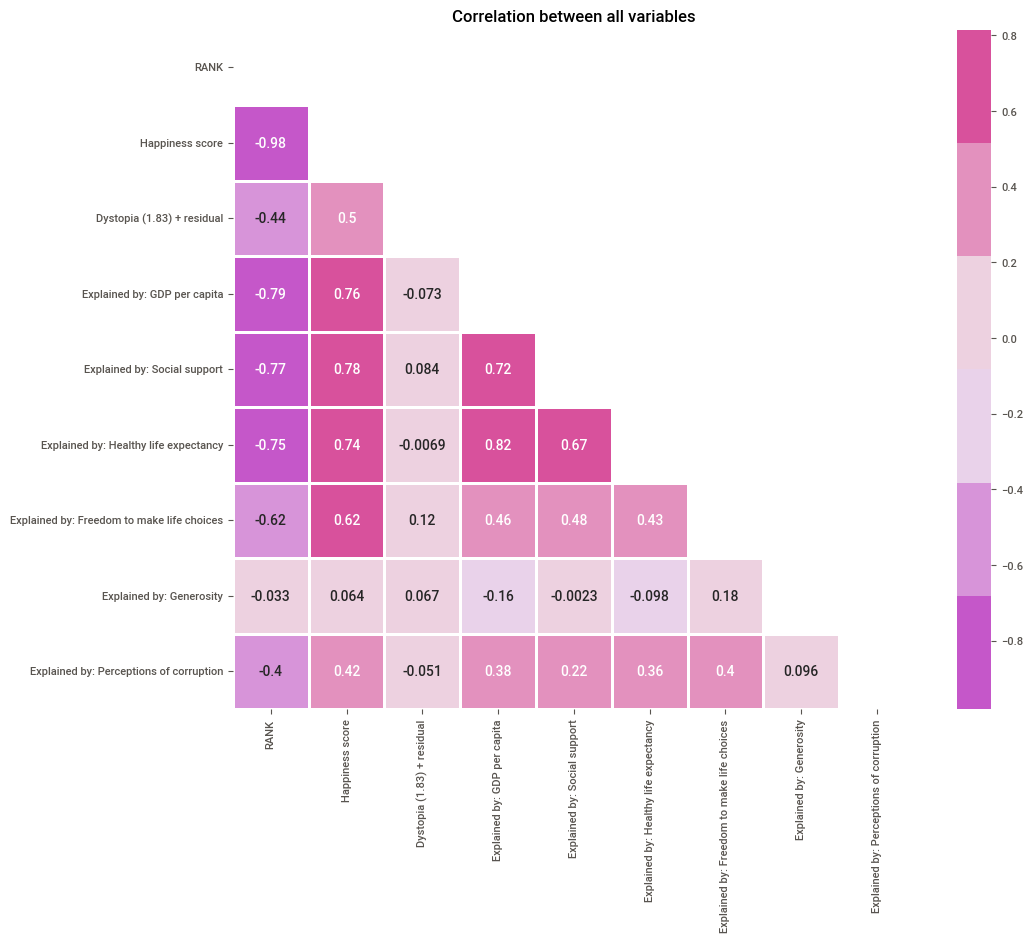

In [16]:
clean_data = data.drop(labels=['Whisker-high', 'Whisker-low'], axis = 1)
clean_data.head()

corr = clean_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(306, 340, 67, 55, n=6),
            mask=mask, cbar=True, linecolor='white',  linewidths=2).set(title="Correlation between all variables"); 

Finalmente queremos ver la correlación que presentan las diferentes variables. Para ello, la mejor opción es la matriz de correlaciones que nos permite visualizar el coeficiente de conexión entre las diferentes variables de manera muy visual y de facil comprensión. 

Podemos observar que el rango sería la variable  que presenta mas conexión con el resto de variables. Hemos emplelado el color magenta para expresar el mayor coeficiente y un color más claro conforme va disminuyendo el coeficiente. 

No creo que se pudiese realizar otro gráfico para realizar esta visualización en cuestión. Una tabla de correlaciones pero estaríamos sacrificando la facilidad a la hora de interpretar datos

Text(0.5, 1.0, 'Comparison of Russia and Ucraine')

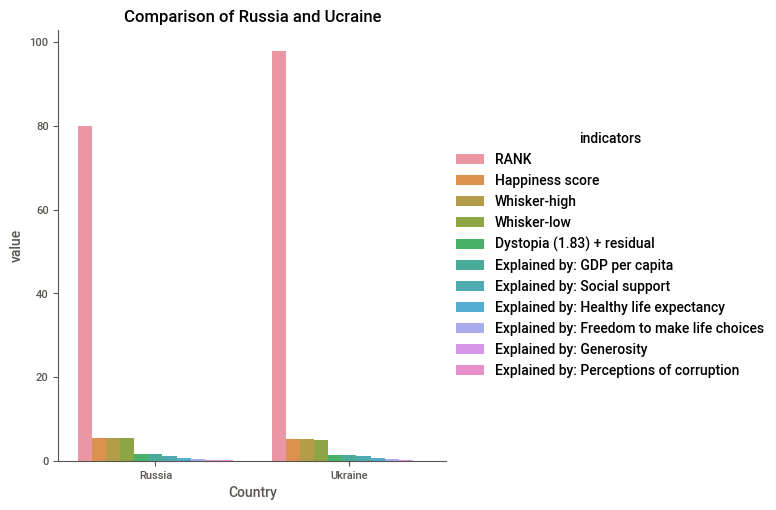

In [17]:
rus_vs_ukr = data[clean_data['Country'].isin(["Russia","Ukraine"])]
rus_vs_ukr

df_melt = pd.melt(rus_vs_ukr, id_vars="Country", var_name="indicators", value_name="value")
df_melt

sns.catplot(x='Country', y='value', hue='indicators', data=df_melt, kind='bar')
plt.title('Comparison of Russia and Ucraine')

Finalmente y debido a la situación actual hemos querido mostrar una comparativa de las diferentes variables para dos paises en cocreto: Rusia y Ucrania. El barplot que hemos elegido nos permite observar. que hay una relación entre amboos paises ya que se distribuyen de forma muy parecida en cuanto a los valores que presenta cada país en las diferentes variables. 

Gracias a este barplot podemos observar que ambos paises se encuentran muy abajo en el ranking debido a que tomán unos valores bajos en las diferentes variables que definen el ranking. Podemos ver gracias a este gráfico como el hecho de que tome valores bajos en las variables hace que incremente su puesto en el ranking. 